<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part c: Clustering Methods LAB


# Clustering Methods Exercises


## Introduction

This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Question 1

*   Import the data and examine the features.
*   Note which are continuous, categorical, and boolean.
*   How many entries are there for the two colors and range of qualities?
*   Make a histogram plot of the quality for each of the wine colors.


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/Wine_Quality_Data.csv")
data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

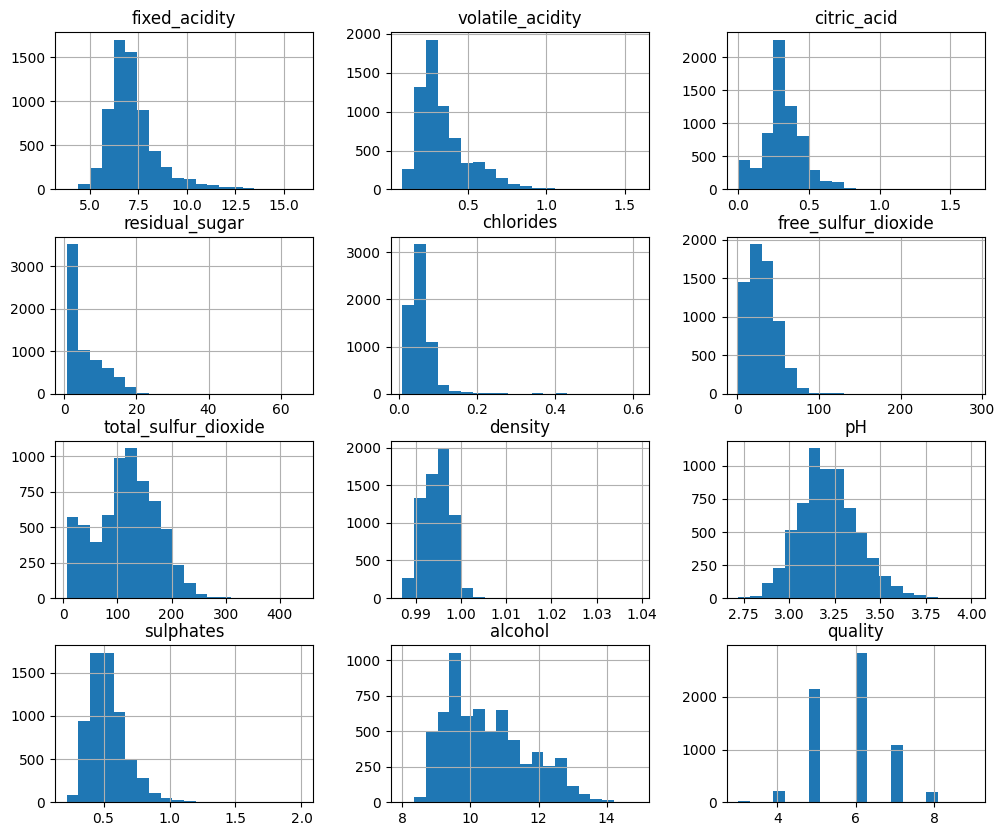

In [7]:
data.hist(bins=20, figsize=(12, 10))

[Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6'),
 Text(7.5, 0, '7'),
 Text(8.5, 0, '8'),
 Text(9.5, 0, '9')]

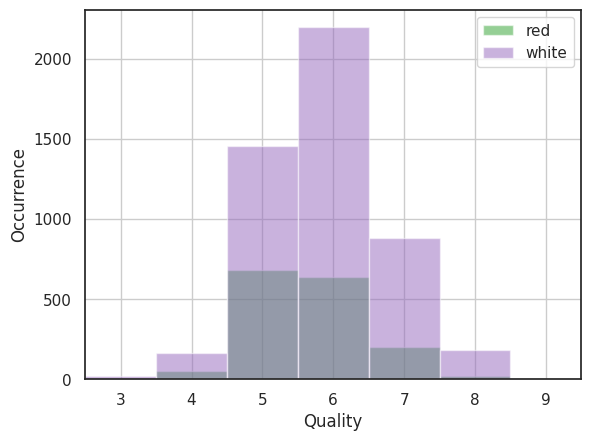

In [11]:
sns.set_context('notebook')
sns.set_style('white')

y_columns = ['red', 'white']
red = sns.color_palette()[2]
white = sns.color_palette()[4]
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])
ax = plt.axes()

for color, plot_color in zip(y_columns, [red, white]):
    sub_data = data.loc[data['color'] == color, 'quality']
    sub_data.hist(bins=bin_range,
                  alpha=0.5,
                  ax=ax,
                  color=plot_color,
                  label=color)

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range)

## Question 2

*   Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).
*   Perform any appropriate feature transformations and/or scaling.
*   Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [12]:
float_columns = [col for col in data.columns if col not in ['color', 'quality']]

In [14]:
corr_mat = data[float_columns].corr()

for x in range(len(float_columns)):
    corr_mat.iloc[x, x] = 0.0

<Axes: >

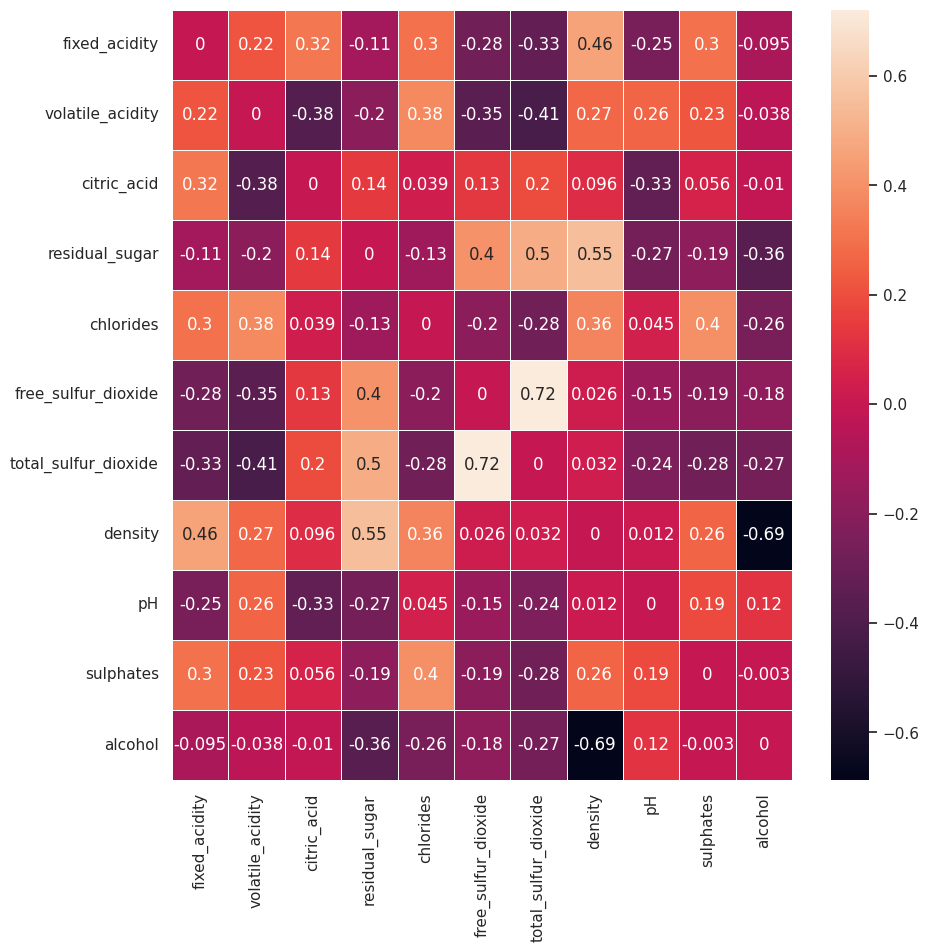

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_mat,
            annot=True,
            linewidths=.5,
            ax=ax)

Examination of skew.

In [21]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [22]:
skewed_column_names = [col for col in skew_columns.index.tolist()]
data[skewed_column_names] = data[skewed_column_names].apply(lambda x: np.log1p(x))

Apply feature scaling

In [24]:
ss = StandardScaler()
data[float_columns] = ss.fit_transform(data[float_columns])
data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red


In [25]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'})

## Question 3

*   Fit a K-means clustering model with two clusters.
*   Examine the clusters by counting the number of red and white wines in each cluster.
